<a href="https://www.kaggle.com/code/manojs048/wallmart-sales?scriptVersionId=125214321" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

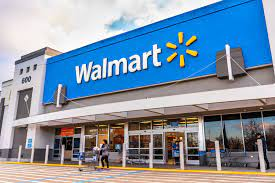


# Summary & Objective :
## Historical sales data for 45 Walmart stores located in different regions are available. There are certain events and holidays which impact sales on each day. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to inappropriate machine learning algorithm. Walmart would like to predict the sales and demand accurately. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc. The objective is to determine the factors affecting the sales and to analyze the impact of markdowns around holidays on the sales.



# Data Understanding :
## This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in which you will find the following fields:

### Store - the store number
### Date - the week of sales
### Weekly_Sales - sales for the given store
### Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
### Temperature - Temperature on the day of sale
### Fuel_Price - Cost of fuel in the region
### CPI – Prevailing consumer price index
### Unemployment - Prevailing unemployment rate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/wallmart-sale/Walmart.csv')

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.shape

(6074, 8)

In [5]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6074 entries, 0 to 6073
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6074 non-null   int64  
 1   Date          6074 non-null   object 
 2   Weekly_Sales  6074 non-null   float64
 3   Holiday_Flag  6074 non-null   int64  
 4   Temperature   6074 non-null   float64
 5   Fuel_Price    6074 non-null   float64
 6   CPI           6074 non-null   float64
 7   Unemployment  6074 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 379.8+ KB


In [7]:
df.nunique()

Store             43
Date             143
Weekly_Sales    6074
Holiday_Flag       2
Temperature     3497
Fuel_Price       892
CPI             2070
Unemployment     339
dtype: int64

In [8]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
labelencoder=LabelEncoder()

In [10]:
# Converting the categprical features to numerical features
for i in df.columns:
    if df[i].dtype == "object":
        df[i]=df[i].astype('category').cat.codes

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6074 entries, 0 to 6073
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6074 non-null   int64  
 1   Date          6074 non-null   int16  
 2   Weekly_Sales  6074 non-null   float64
 3   Holiday_Flag  6074 non-null   int64  
 4   Temperature   6074 non-null   float64
 5   Fuel_Price    6074 non-null   float64
 6   CPI           6074 non-null   float64
 7   Unemployment  6074 non-null   float64
dtypes: float64(5), int16(1), int64(2)
memory usage: 344.2 KB


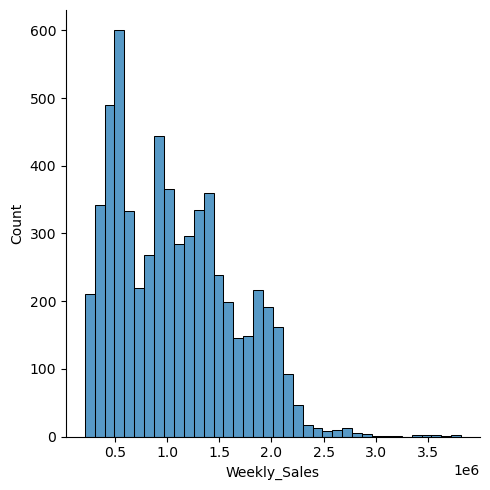

In [12]:
sns.displot(df.Weekly_Sales)

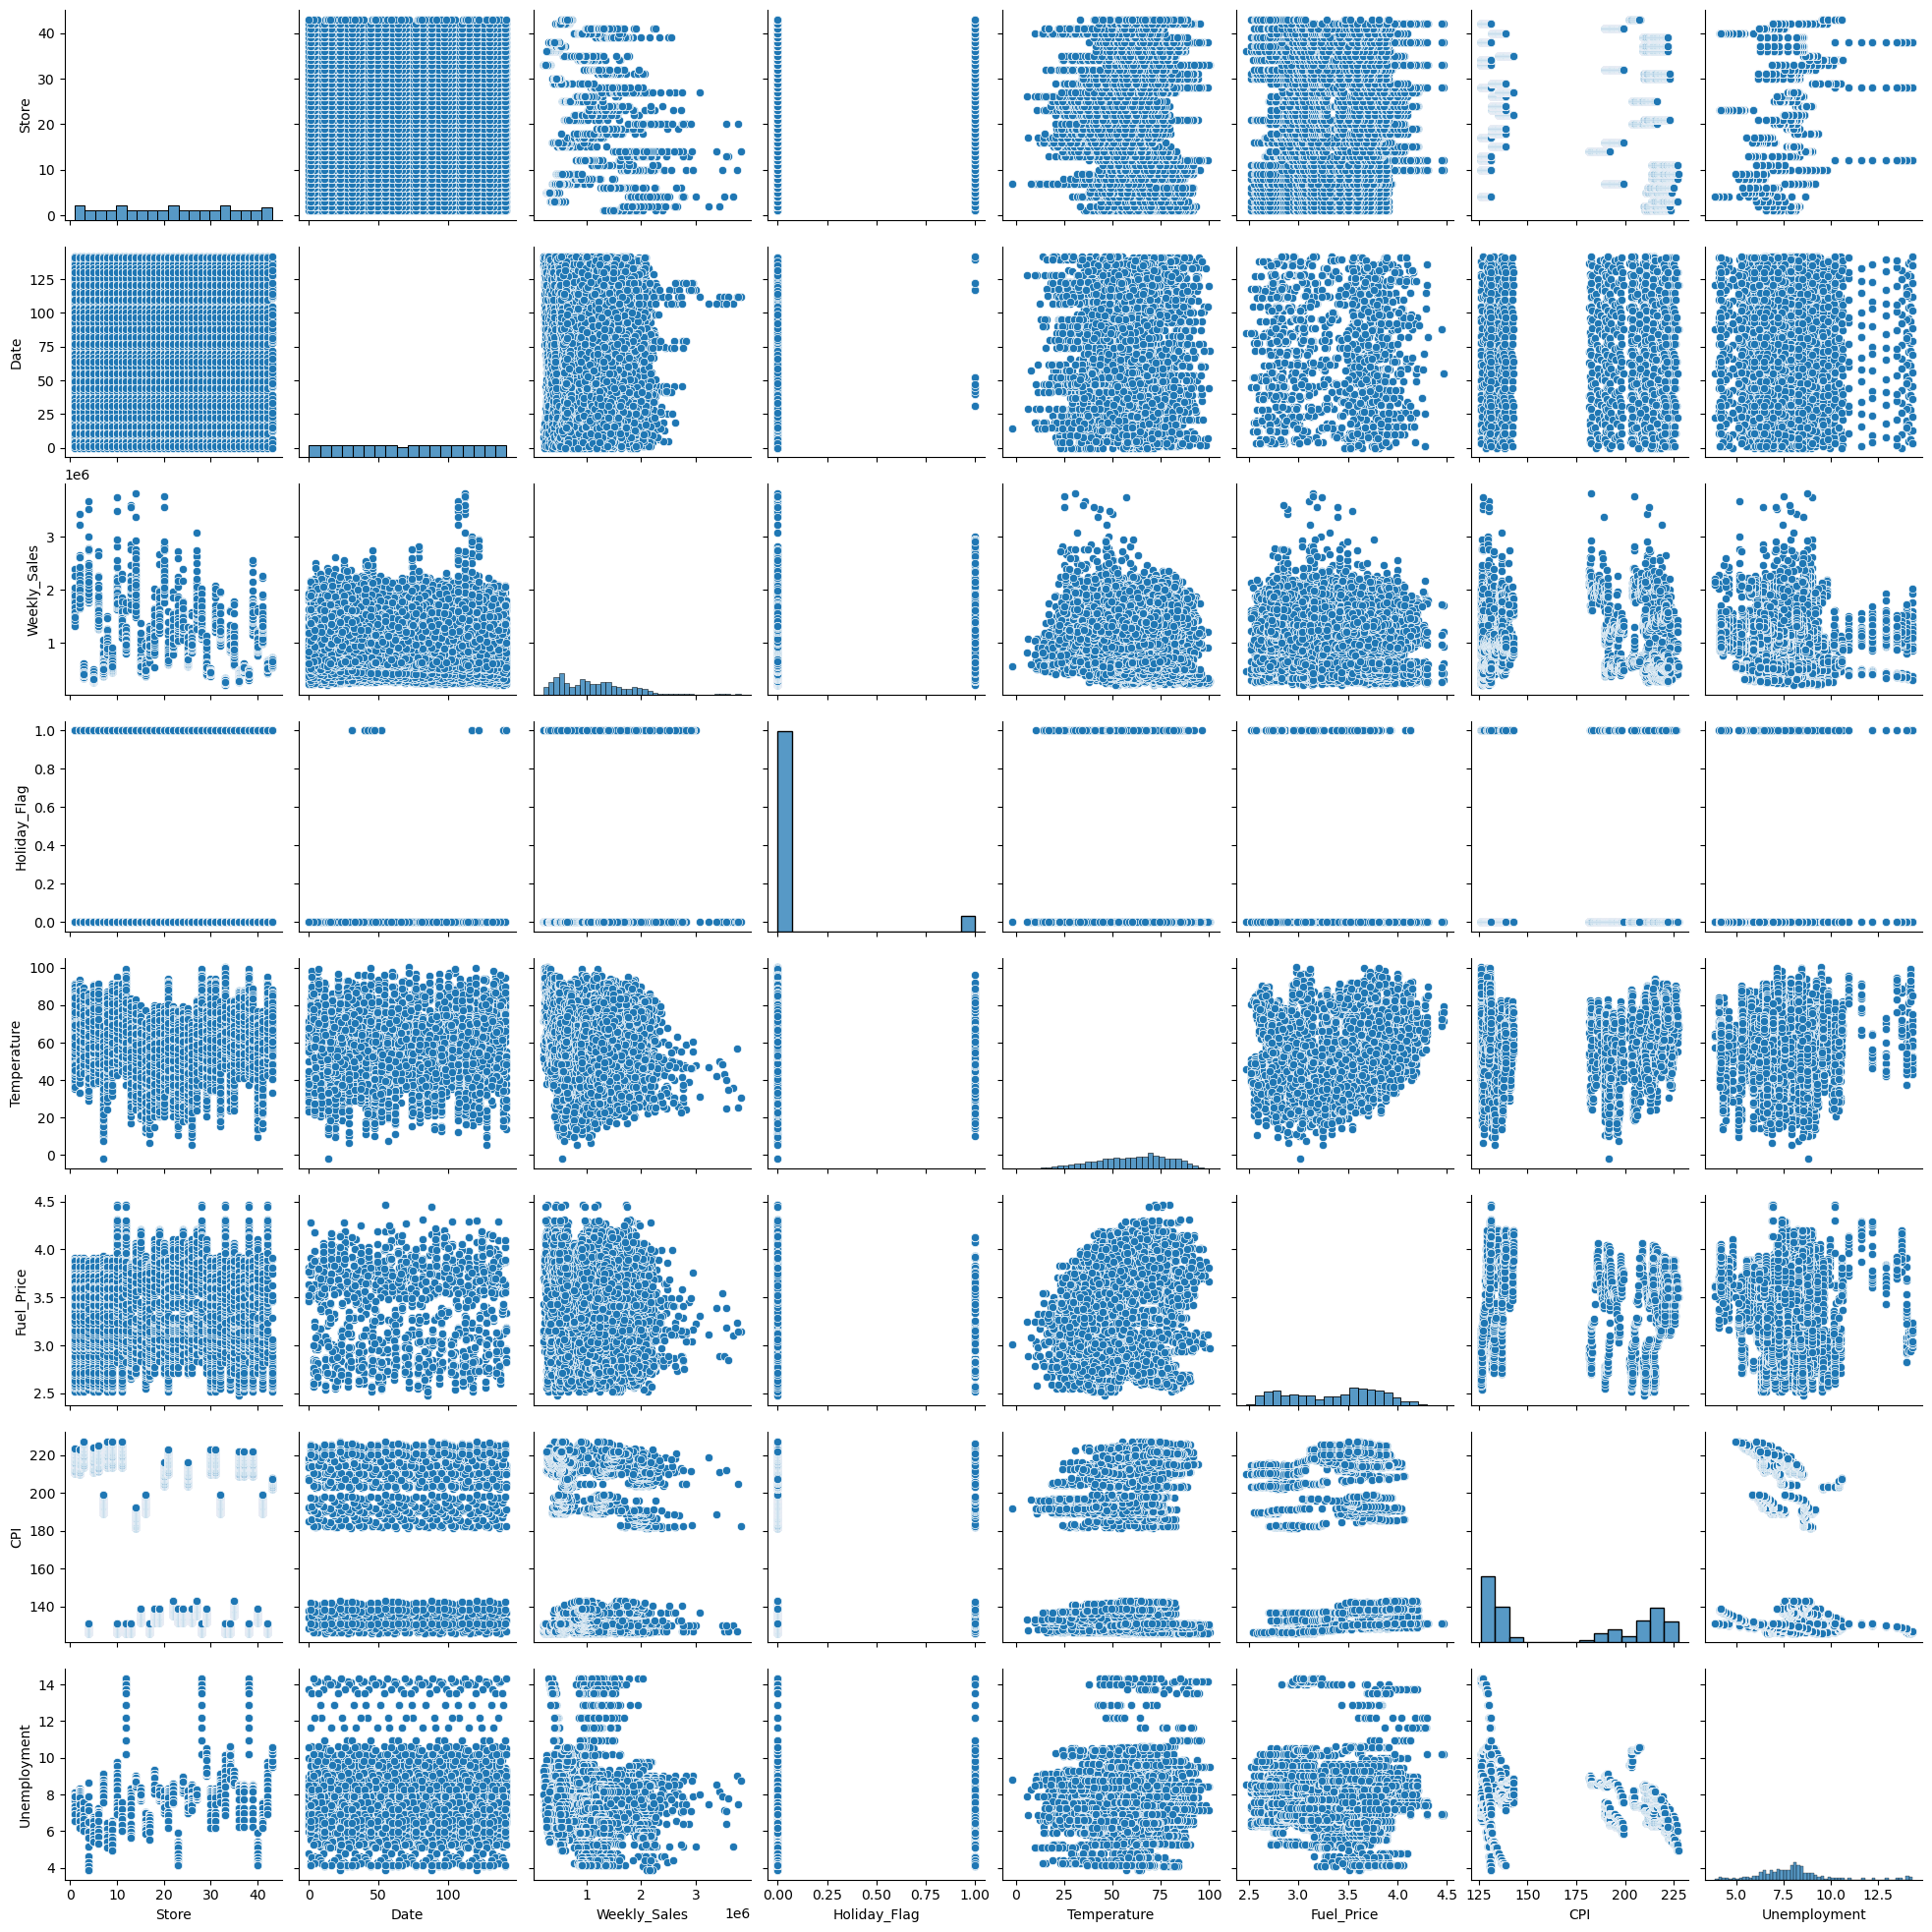

In [13]:
sns.pairplot(df)

In [14]:
df.corr()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,-0.000422,-0.282704,0.000274,-0.014984,0.061002,-0.224916,0.239688
Date,-0.000422,1.000000,-0.015790,0.045554,0.034259,0.023011,0.002338,-0.004300
Weekly_Sales,-0.282704,-0.015790,1.000000,0.038345,-0.074707,0.009287,-0.096757,-0.117976
Holiday_Flag,0.000274,0.045554,0.038345,1.000000,-0.154823,-0.077874,-0.002004,0.011110
Temperature,-0.014984,0.034259,-0.074707,-0.154823,1.000000,0.138354,0.169791,0.095037
Fuel_Price,0.061002,0.023011,0.009287,-0.077874,0.138354,1.000000,-0.189474,-0.034000
CPI,-0.224916,0.002338,-0.096757,-0.002004,0.169791,-0.189474,1.000000,-0.344538
Unemployment,0.239688,-0.004300,-0.117976,0.011110,0.095037,-0.034000,-0.344538,1.000000


In [15]:
# Linear Regression :
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
X = df[['Store','Fuel_Price','CPI','Unemployment','Date']]
Y = df['Weekly_Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [16]:
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, Y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
#sns.scatterplot(Y_pred, Y_test)
import warnings
warnings.filterwarnings('ignore')

Linear Regression:

Accuracy: 12.114105052527368
Mean Absolute Error: 441039.90569947375
Mean Squared Error: 278915684925.3187
Root Mean Squared Error: 528124.6869114515


In [17]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor()        
rfr.fit(X_train,Y_train)
Y_pred = rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, Y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
#sns.scatterplot(Y_pred, Y_test)


import warnings
warnings.filterwarnings('ignore')

Random Forest Regressor:

Accuracy: 91.85600455428661
Mean Absolute Error: 76863.4176404115
Mean Squared Error: 25497357355.87636
Root Mean Squared Error: 159678.91957261096


Here, Linear Regression is not an appropriate model to use which is clear from it's low accuracy. However, Random Forest Regression gives accuracy of over 95% , so, it is the best model to forecast demand

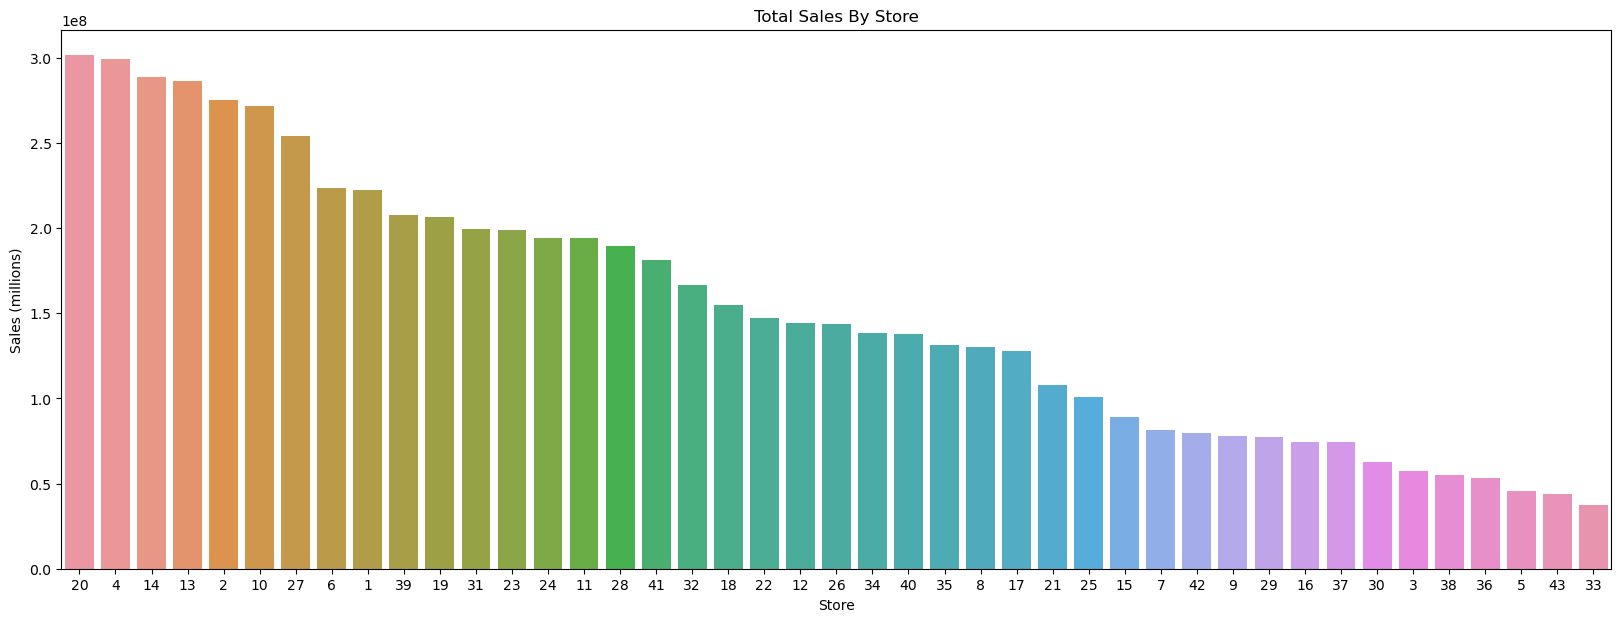

In [18]:
plt.figure(figsize = (20,7))
barplot = sns.barplot(x = 'Store',
           y = 'Weekly_Sales',
           data = df,
           estimator = np.sum,
           ci = None,
           order = df.groupby('Store').agg('sum').reset_index().sort_values(by = 'Weekly_Sales', ascending = False)['Store']).set_title('Total Sales By Store')
plt.ylabel('Sales (millions)')
plt.show()

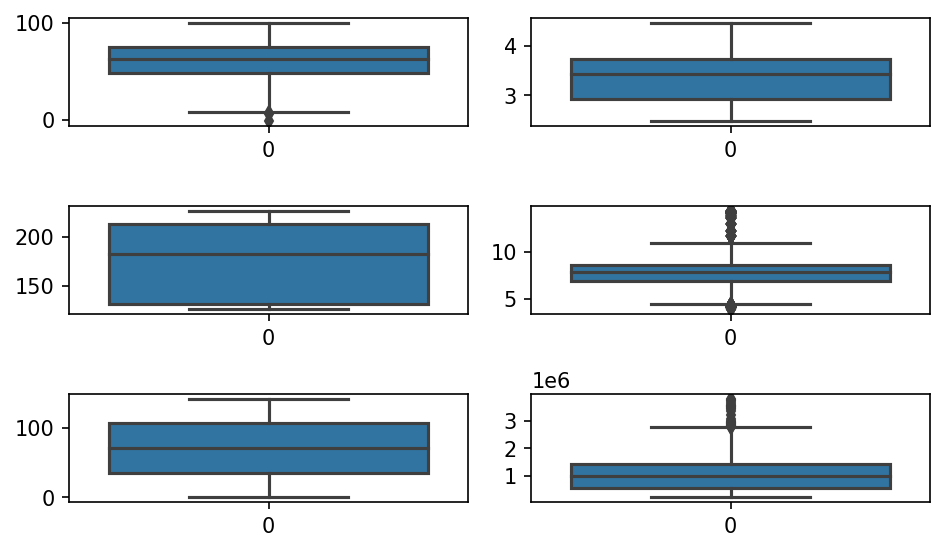

In [19]:
# Checking for outlier and NaN value

features_list = 'Temperature, Fuel_Price, CPI, Unemployment, Date, Weekly_Sales'.split(", ")

plt.figure(dpi=150)
count = 1
for feature in features_list:
    plt.subplot(4,2,count)
    sns.boxplot(df[feature])
    count += 1
plt.tight_layout()
plt.show()